<IPython.core.display.Javascript object>


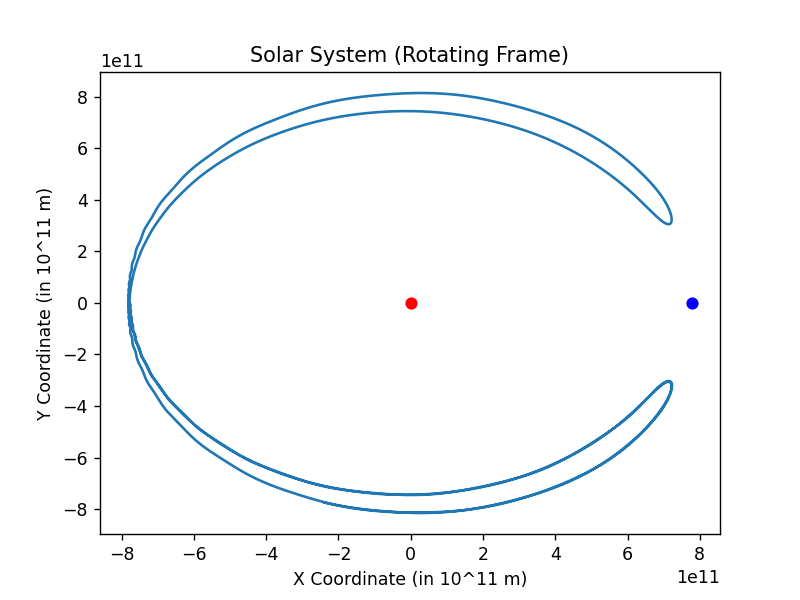

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation
%matplotlib notebook

#time interval
n_years = 1000
dur = 24*3600*365.25*n_years
dt = 3600

#Constants
G = 6.6743*10**-11
M_Sun = 1.98847*10**30
GM_Sun = G*M_Sun
M_Jup = 1.89813*10**27
GM_Jup = G*M_Jup
R_Jup = 778.479*10**9
omega = np.sqrt(GM_Sun/R_Jup**3)

#Sun coordinates (the centre of mass is the origin)
xS = -R_Jup*M_Jup/(M_Sun + M_Jup)
yS = 0

#Jupiter coordinates
xJ = R_Jup*M_Sun/(M_Sun + M_Jup)
yJ = 0

#Asteroid initial coordinates
x0 = -R_Jup
y0 = 0
vx0 = 0
vy0 = 0

def Acceleration(vector):
    x, y, vx, vy = vector[0], vector[1], vector[2], vector[3]
    p1 = np.sqrt(((x - xS)*(x - xS) + (y - yS)*(y - yS)))
    p2 = np.sqrt(((x - xJ)*(x - xJ) + (y - yJ)*(y - yJ)))
    Ax = 2*omega*vy + x*omega*omega - GM_Sun*(x - xS)/(p1*p1*p1) - GM_Jup*(x - xJ)/(p2*p2*p2)
    Ay = -2*omega*vx + y*omega*omega - GM_Sun*(y - yS)/(p1*p1*p1) - GM_Jup*(y - yJ)/(p2*p2*p2)
    return Ax, Ay
    
#Function for conducting the Euler-Richardson Simulation
def Euler_Richardson_Iterate(vector, i):
    x, y = vector[i, 0], vector[i, 1]
    vx, vy = vector[i, 2], vector[i, 3]
    
    Ax, Ay = Acceleration(vector[i, :])
    
    vx_mid, vy_mid = vx + Ax*dt/2, vy + Ay*dt/2
    x_mid, y_mid = x + vx_mid*dt/2, y + vy*dt/2
    
    Ax_mid, Ay_mid = Acceleration([x_mid, y_mid, vx_mid, vy_mid])
    
    vx1, vy1 = vx + Ax_mid*dt, vy + Ay_mid*dt
    x1, y1 = x + vx1*dt, y + vy1*dt
    
    vector[i + 1, :] = [x1, y1, vx1, vy1]
    

t_array = np.arange(0, dur, dt)
n = t_array.size

vector = np.ones((n, 4))
vector[0, :] = [x0, y0, vx0, vy0]

plt.title("Solar System (Rotating Frame)")
plt.xlabel("X Coordinate (in 10^11 m)")
plt.ylabel("Y Coordinate (in 10^11 m)")    

#the Sun
plt.plot(0, 0, "ro")

#Jupiter
plt.plot(xJ, 0, "bo")

for i in range(t_array.size - 1):
    Euler_Richardson_Iterate(vector, i)

plt.plot(vector[:, 0], vector[:, 1])